In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'data\Auto MPG\auto-mpg.data' , sep='\s+' , header=None) 
df.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight' , 'acceleration' , 'model_year' , 'origin' , 'car_name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df['mpg'].nunique

<bound method IndexOpsMixin.nunique of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64>

In [5]:
df.replace('?', np.nan, inplace=True)
# df.loc[df['horsepower'] == '?', 'horsepower'] = np.nan

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['horsepower'] = imputer.fit_transform(df[['horsepower']])

In [7]:
df['car_name'].value_counts()

car_name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

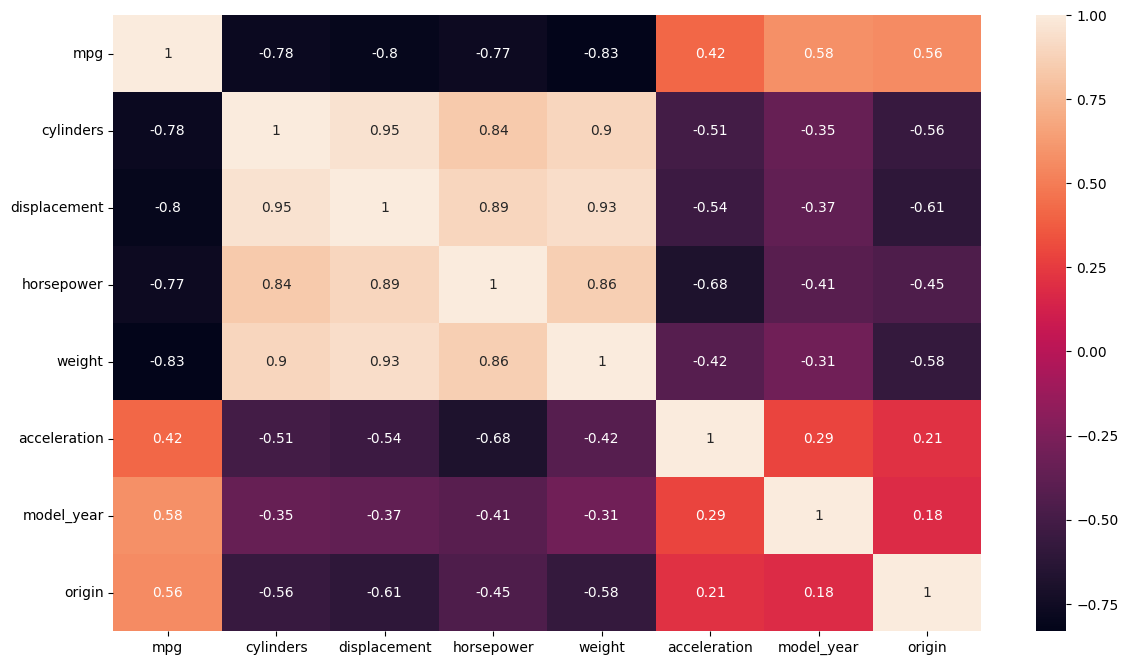

In [8]:
plt.figure(figsize=(14,8) ,dpi=100)

sns.heatmap(df.corr(numeric_only=True) , annot = True);

# Utils

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN



class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = 'Fertility'
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

# Train | Test Split

In [10]:
X_train , X_test , y_train , y_test = fonks.trainTest(df.drop(['car_name','mpg'] , axis = 1) , df['mpg']  , test_size=0.2)

# Models

### Linear Model

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train , y_train)

lr_train_pred = lr.predict(X_train)
lr_pred = lr.predict(X_test)

fonks.simple_scores(y_train, lr_train_pred , y_test , lr_pred , 'LR')

LR Train R2 : 0.8212022028857258
LR Train Mae : 2.438128795235249
LR Train RMSE : 3.2008964154569424
LR Train MSE : 10.245737862485102

****************

LR Test R2 : 0.8085626614171828
LR Test Mae : 2.7153568674914768
LR Test RMSE : 3.725642602742039
LR Test MSE : 13.880412803366474


In [12]:
lr_r2 = fonks.get_r2_score(y_test , lr_pred)
lr_mae = fonks.get_mae_score(y_test , lr_pred)
lr_rmse = fonks.get_rmse_score(y_test , lr_pred)
# nb_rocauc = fonks.get_roc_auc(y_test , nb_pred , "NB")
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')

lr_df = fonks.train_test_df(y_train, lr_train_pred , y_test , lr_pred , 'LR')
lr_df

,LR_train,LR_test
R2,0.821202,0.808563
mae,2.438129,2.715357
mse,10.245738,13.880413
rmse,3.200896,3.725643


### Ridge Model

In [13]:
from sklearn.linear_model import RidgeCV

rdg_grid = RidgeCV(alphas=np.arange(0.001,100,1) , cv = 3)

rdg_grid.fit(X_train , y_train)

print(f"Ridge Best Score : {rdg_grid.best_score_}")
print(f"Ridge Best Alpha : {rdg_grid.alpha_}")

Ridge Best Score : 0.8052683935136057
Ridge Best Alpha : 1.001


In [14]:
from sklearn.linear_model import Ridge

rdg = Ridge(alpha = 1)

rdg.fit(X_train , y_train)

rdg_train_pred = rdg.predict(X_train)
rdg_pred = rdg.predict(X_test)

fonks.simple_scores(y_train, rdg_train_pred , y_test , rdg_pred , 'Ridge')

Ridge Train R2 : 0.8212008619988072
Ridge Train Mae : 2.4378961463592588
Ridge Train RMSE : 3.2009084179316747
Ridge Train MSE : 10.245814699985857

****************

Ridge Test R2 : 0.8085920515053484
Ridge Test Mae : 2.71546881236964
Ridge Test RMSE : 3.7253566053282516
Ridge Test MSE : 13.878281836862834


In [15]:
rdg_r2 = fonks.get_r2_score(y_test , rdg_pred)
rdg_mae = fonks.get_mae_score(y_test , rdg_pred)
rdg_rmse = fonks.get_rmse_score(y_test , rdg_pred)
# nb_rocauc = fonks.get_roc_auc(y_test , nb_pred , "NB")
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')

rdg_df = fonks.train_test_df(y_train, rdg_train_pred , y_test , rdg_pred , 'Ridge')
all_df = pd.concat([lr_df , rdg_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test
R2,0.821202,0.808563,0.821201,0.808592
mae,2.438129,2.715357,2.437896,2.715469
mse,10.245738,13.880413,10.245815,13.878282
rmse,3.200896,3.725643,3.200908,3.725357


### Lasso 

In [16]:
from sklearn.linear_model import LassoCV

las_grid = LassoCV(alphas=np.arange(0.001,100,1) , cv = 3)

las_grid.fit(X_train , y_train)

# print(f"Lasso Best Score : {las_grid.best_score_}")
print(f"Lasso Best Alpha : {las_grid.alpha_}")

Lasso Best Alpha : 0.001


In [17]:
# 0.001 is too low for C value. So Lasso is not good model for that dataset.

### SVR

In [18]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     svr_base = SVR()

#     params = {'kernel' : ['linear' , 'poly' , 'rbf' ] , 'degree' : [2,3] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,10) }

#     svr_grid = GridSearchCV(svr_base , params , scoring='neg_mean_squared_error' , cv = 3)
#     svr_grid.fit(X_train , y_train)

# print(f'Best parameters: {svr_grid.best_params_}')
# print(f'Best score: {svr_grid.best_score_:.2f}')

# unpatch_sklearn()

In [19]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf' , C=300 , gamma='scale')
svr.fit(X_train , y_train)

svr_train_pred = svr.predict(X_train)
svr_pred = svr.predict(X_test)

fonks.simple_scores(y_train, svr_train_pred , y_test , svr_pred , 'SVR')

SVR Train R2 : 0.7507913980550671
SVR Train Mae : 2.6559826006972607
SVR Train RMSE : 3.7789578915202333
SVR Train MSE : 14.280522745883047

****************

SVR Test R2 : 0.6805533350573589
SVR Test Mae : 3.4557776725443636
SVR Test RMSE : 4.812680669148453
SVR Test MSE : 23.161895223195206


In [20]:
svr_r2 = fonks.get_r2_score(y_test , svr_pred)
svr_mae = fonks.get_mae_score(y_test , svr_pred)
svr_rmse = fonks.get_rmse_score(y_test , svr_pred)

svr_df = fonks.train_test_df(y_train, svr_train_pred , y_test , svr_pred , 'SVR')
all_df = pd.concat([all_df , svr_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test
R2,0.821202,0.808563,0.821201,0.808592,0.750791,0.680553
mae,2.438129,2.715357,2.437896,2.715469,2.655983,3.455778
mse,10.245738,13.880413,10.245815,13.878282,14.280523,23.161895
rmse,3.200896,3.725643,3.200908,3.725357,3.778958,4.812681


## Decision Tree Model

In [21]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     dt_base = DecisionTreeRegressor(random_state= 53)

#     params = {'max_depth' : np.arange(2,7) , 'min_samples_split' : np.arange(2,6)}

#     dt_grid = GridSearchCV(dt_base , params , cv = 3 , scoring= 'neg_root_mean_squared_error' )
#     dt_grid.fit(X_train , y_train)

# print(f"DT Best Params is : {dt_grid.best_params_}")
# print(f"DT Best Score is : {dt_grid.best_score_}")

# unpatch_sklearn()

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5 , min_samples_split=5 , random_state= 53)
dt.fit(X_train , y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

fonks.simple_scores(y_train, dt_train_pred , y_test , dt_pred , 'DT')

DT Train R2 : 0.9293985718123496
DT Train Mae : 1.551271759062226
DT Train RMSE : 2.0113946075094633
DT Train MSE : 4.0457082671181475

****************

DT Test R2 : 0.8088522961429422
DT Test Mae : 2.626321400091137
DT Test RMSE : 3.7228231842920914
DT Test MSE : 13.859412461502705


In [23]:
dt_r2 = fonks.get_r2_score(y_test , dt_pred)
dt_mae = fonks.get_mae_score(y_test , dt_pred)
dt_rmse = fonks.get_rmse_score(y_test , dt_pred)

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_test , dt_pred , 'DT')
all_df = pd.concat([all_df , dt_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test,DT_train,DT_test
R2,0.821202,0.808563,0.821201,0.808592,0.750791,0.680553,0.929399,0.808852
mae,2.438129,2.715357,2.437896,2.715469,2.655983,3.455778,1.551272,2.626321
mse,10.245738,13.880413,10.245815,13.878282,14.280523,23.161895,4.045708,13.859412
rmse,3.200896,3.725643,3.200908,3.725357,3.778958,4.812681,2.011395,3.722823


## Random Forest

In [24]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import dpctl
# from sklearnex import patch_sklearn, config_context , unpatch_sklearn

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     rf_base = RandomForestRegressor()

#     params = {'n_estimators' : np.arange(80,1000,10) , 'max_depth' : np.arange(2,11) , 'max_features' : np.arange(2,6) , 'min_samples_split' : [2,3]}

#     rf_rnd = RandomizedSearchCV(rf_base , params , scoring= 'neg_root_mean_squared_error' , cv = 3 , n_iter = 30)
#     rf_rnd.fit(X_train , y_train)

# print(f"RF Best Params is : {rf_rnd.best_params_}")
# print(f"RF Best Score is : {rf_rnd.best_score_}")

# unpatch_sklearn()

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 440 , max_depth=9 , min_samples_split=2 , max_features=5)
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

fonks.simple_scores(y_train, rf_train_pred , y_test , rf_pred , 'RF')

RF Train R2 : 0.9795805481971587
RF Train Mae : 0.7864733078192615
RF Train RMSE : 1.0817143161336686
RF Train MSE : 1.1701058617285305

****************

RF Test R2 : 0.8710252526348178
RF Test Mae : 2.140956378430757
RF Test RMSE : 3.0580192156624966
RF Test MSE : 9.35148152336107


In [26]:
rf_r2 = fonks.get_r2_score(y_test , rf_pred)
rf_mae = fonks.get_mae_score(y_test , rf_pred)
rf_rmse = fonks.get_rmse_score(y_test , rf_pred)

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_test , rf_pred , 'RF')
all_df = pd.concat([all_df , rf_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test
R2,0.821202,0.808563,0.821201,0.808592,0.750791,0.680553,0.929399,0.808852,0.979581,0.871025
mae,2.438129,2.715357,2.437896,2.715469,2.655983,3.455778,1.551272,2.626321,0.786473,2.140956
mse,10.245738,13.880413,10.245815,13.878282,14.280523,23.161895,4.045708,13.859412,1.170106,9.351482
rmse,3.200896,3.725643,3.200908,3.725357,3.778958,4.812681,2.011395,3.722823,1.081714,3.058019


## Gradient Boosting

In [27]:
# from sklearn.ensemble import GradientBoostingRegressor

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     gb_base = GradientBoostingRegressor()

#     params = {'n_estimators' : np.arange(80,1000,10) , 'learning_rate' : [0.001,0.01,0.1,1] , 'subsample' : [0.8 , 1] , 'max_depth' : np.arange(2,11)}

#     gb_rnd = RandomizedSearchCV(gb_base , params , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter=50)
#     gb_rnd.fit(X_train , y_train)

# print(f"GB Best Params is : {gb_rnd.best_params_}")
# print(f"GB Best Score is : {gb_rnd.best_score_}")

# unpatch_sklearn()

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators= 240 , max_depth=10 , learning_rate= 0.01 , subsample= 0.8 )
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

fonks.simple_scores(y_train, gb_train_pred , y_test , gb_pred , 'GB')

GB Train R2 : 0.9897858593438148
GB Train Mae : 0.6196931743106663
GB Train RMSE : 0.7650528816505644
GB Train MSE : 0.5853059117218324

****************

GB Test R2 : 0.8514769280988082
GB Test Mae : 2.284939624457523
GB Test RMSE : 3.281593846916782
GB Test MSE : 10.768858176122086


In [29]:
gb_r2 = fonks.get_r2_score(y_test , gb_pred)
gb_mae = fonks.get_mae_score(y_test , gb_pred)
gb_rmse = fonks.get_rmse_score(y_test , gb_pred)

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_test , gb_pred , 'GB')
all_df = pd.concat([all_df , gb_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test
R2,0.821202,0.808563,0.821201,0.808592,0.750791,0.680553,0.929399,0.808852,0.979581,0.871025,0.989786,0.851477
mae,2.438129,2.715357,2.437896,2.715469,2.655983,3.455778,1.551272,2.626321,0.786473,2.140956,0.619693,2.284940
mse,10.245738,13.880413,10.245815,13.878282,14.280523,23.161895,4.045708,13.859412,1.170106,9.351482,0.585306,10.768858
rmse,3.200896,3.725643,3.200908,3.725357,3.778958,4.812681,2.011395,3.722823,1.081714,3.058019,0.765053,3.281594


## XGB Model

In [30]:
# from xgboost import XGBRegressor

# patch_sklearn()

# with config_context(target_offload = 'gpu:0'):
#     xgb_base = XGBRegressor(tree_method = 'gpu_hist')

#     params = {
#         'learning_rate': [0.01, 0.05, 0.1],
#         'n_estimators': [100, 200, 300],
#         'max_depth': [3, 5, 7],
#         'min_child_weight': [1, 3, 5],
#         'gamma': [0, 0.1, 0.2],
#         'subsample': [0.7, 0.8, 0.9],
#         'colsample_bytree': [0.6, 0.7, 0.8],
#         'reg_alpha': [0, 0.01, 0.05],
#         'reg_lambda': [0, 0.01, 0.05],
#     }

#     params2 = {
#         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#         'n_estimators': [100, 200, 300, 400, 500],
#         'gamma': [0, 1, 5, 10],
#         'min_child_weight': [1, 3, 5, 7],
#         'scale_pos_weight': [1, 2, 3, 4, 5]
#     }

#     xgb_rnd = RandomizedSearchCV(xgb_base , params , scoring= 'neg_root_mean_squared_error' , cv = 5 , n_iter= 100)
#     xgb_rnd.fit(X_train , y_train)

# print(f"XGB Best Params is : {xgb_rnd.best_params_}")
# print(f"XGB Best Score is : {xgb_rnd.best_score_}")

# unpatch_sklearn()

In [31]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 200 , min_child_weight = 5 , max_depth = 5 , learning_rate = 0.05 , gamma = 0, colsample_bytree = 0.7 , subsample= 0.7 , reg_alpha = 0.05 , reg_lambda=0.01)
xgb.fit(X_train , y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_test)

fonks.simple_scores(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')

XGB Train R2 : 0.9829823881200594
XGB Train Mae : 0.7387633227702207
XGB Train RMSE : 0.9875062329604923
XGB Train MSE : 0.9751685601358221

****************

XGB Test R2 : 0.8802132118105352
XGB Test Mae : 1.9996734547615052
XGB Test RMSE : 2.947082729299422
XGB Test MSE : 8.68529661333493


In [32]:
xgb_r2 = fonks.get_r2_score(y_test , xgb_pred)
xgb_mae = fonks.get_mae_score(y_test , xgb_pred)
xgb_rmse = fonks.get_rmse_score(y_test , xgb_pred)

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , xgb_pred , 'XGB')
all_df = pd.concat([all_df , xgb_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test
R2,0.821202,0.808563,0.821201,0.808592,0.750791,0.680553,0.929399,0.808852,0.979581,0.871025,0.989786,0.851477,0.982982,0.880213
mae,2.438129,2.715357,2.437896,2.715469,2.655983,3.455778,1.551272,2.626321,0.786473,2.140956,0.619693,2.284940,0.738763,1.999673
mse,10.245738,13.880413,10.245815,13.878282,14.280523,23.161895,4.045708,13.859412,1.170106,9.351482,0.585306,10.768858,0.975169,8.685297
rmse,3.200896,3.725643,3.200908,3.725357,3.778958,4.812681,2.011395,3.722823,1.081714,3.058019,0.765053,3.281594,0.987506,2.947083


## LightGBM

In [33]:
# from lightgbm import LGBMRegressor

# patch_sklearn()

# with config_context(target_offload='gpu:0'):
#         lgb_base = LGBMRegressor(device = 'gpu')

#         params = {
#                 'n_estimators': [100, 200, 300],
#                 'max_depth': [3, 5, 7 , 6 , 7, 8],
#                 'learning_rate': [1,0.1,0.01],
#                 'subsample': [0.7,0.8, 0.9, 1.0],
#                 'colsample_bytree': [0.8, 0.9, 1.0],
#                 }

#         lgb_grid = GridSearchCV(lgb_base , params , scoring='neg_mean_squared_error' , cv = 3)
#         lgb_grid.fit(X_train,y_train)


# print(f'Best parameters: {lgb_grid.best_params_}')
# print(f'Best score: {lgb_grid.best_score_:.2f}')

# unpatch_sklearn()

In [34]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators= 100 , learning_rate = 0.1 , max_depth = 5 , subsample = 0.8 , colsample_bytree = 0.9)
# lgb = lgb_grid.best_estimator_
lgb.fit(X_train , y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_test)

fonks.simple_scores(y_train, lgb_train_pred , y_test , lgb_pred , 'LGB')

LGB Train R2 : 0.9512387152174783
LGB Train Mae : 1.2025833326237847
LGB Train RMSE : 1.6715836256978536
LGB Train MSE : 2.794191817701182

****************

LGB Test R2 : 0.8848580843671405
LGB Test Mae : 2.0217541447467333
LGB Test RMSE : 2.8893795350458116
LGB Test MSE : 8.348514097541551


In [35]:
lgb_r2 = fonks.get_r2_score(y_test , lgb_pred)
lgb_mae = fonks.get_mae_score(y_test , lgb_pred)
lgb_rmse = fonks.get_rmse_score(y_test , lgb_pred)

lgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_test , lgb_pred , 'LGB')
all_df = pd.concat([all_df , lgb_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test
R2,0.821202,0.808563,0.821201,0.808592,0.750791,0.680553,0.929399,0.808852,0.979581,0.871025,0.989786,0.851477,0.982982,0.880213,0.982982,0.884858
mae,2.438129,2.715357,2.437896,2.715469,2.655983,3.455778,1.551272,2.626321,0.786473,2.140956,0.619693,2.284940,0.738763,1.999673,0.738763,2.021754
mse,10.245738,13.880413,10.245815,13.878282,14.280523,23.161895,4.045708,13.859412,1.170106,9.351482,0.585306,10.768858,0.975169,8.685297,0.975169,8.348514
rmse,3.200896,3.725643,3.200908,3.725357,3.778958,4.812681,2.011395,3.722823,1.081714,3.058019,0.765053,3.281594,0.987506,2.947083,0.987506,2.889380


## CatBoost

In [36]:
params = {'learning_rate': 0.03,
          'objective':'MAE',
          'depth': 6,
          'early_stopping_rounds':1000,
          'iterations': 10000,
          'use_best_model': True,
          'eval_metric': "RMSE",
          'random_state': 986,
          'allow_writing_files': False,
          'thread_count':24
          }

In [37]:
# X_train['X1 transaction date'] = X_train['X1 transaction date'].astype(int).astype('category')
# X_test['X1 transaction date'] = X_test['X1 transaction date'].astype(int).astype('category')

In [38]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(**params,
                #        cat_features=['X1 transaction date']
                        )
cb.fit(X_train,y_train,
        eval_set=[(X_test,y_test)],
        verbose=500)

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_test)

fonks.simple_scores(y_train, cb_train_pred , y_test , cb_pred , 'CB')

0:	learn: 7.4831755	test: 8.8334971	best: 8.8334971 (0)	total: 140ms	remaining: 23m 19s
500:	learn: 1.4559012	test: 2.7459193	best: 2.7303281 (385)	total: 429ms	remaining: 8.13s
1000:	learn: 1.1975649	test: 2.7755141	best: 2.7303281 (385)	total: 709ms	remaining: 6.37s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 2.73032812
bestIteration = 385

Shrink model to first 386 iterations.
CB Train R2 : 0.9563266620784223
CB Train Mae : 0.9208961876255068
CB Train RMSE : 1.5819717770104853
CB Train MSE : 2.5026347032577125

****************

CB Test R2 : 0.8971855970463881
CB Test Mae : 1.959925960297386
CB Test RMSE : 2.7303281458879565
CB Test MSE : 7.4546917842279665


In [39]:
cb_r2 = fonks.get_r2_score(y_test , cb_pred)
cb_mae = fonks.get_mae_score(y_test , cb_pred)
cb_rmse = fonks.get_rmse_score(y_test , cb_pred)

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_test , cb_pred , 'CB')
all_df = pd.concat([all_df , cb_df] , axis = 1)
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test,CB_train,CB_test
R2,0.821202,0.808563,0.821201,0.808592,0.750791,0.680553,0.929399,0.808852,0.979581,0.871025,0.989786,0.851477,0.982982,0.880213,0.982982,0.884858,0.956327,0.897186
mae,2.438129,2.715357,2.437896,2.715469,2.655983,3.455778,1.551272,2.626321,0.786473,2.140956,0.619693,2.284940,0.738763,1.999673,0.738763,2.021754,0.920896,1.959926
mse,10.245738,13.880413,10.245815,13.878282,14.280523,23.161895,4.045708,13.859412,1.170106,9.351482,0.585306,10.768858,0.975169,8.685297,0.975169,8.348514,2.502635,7.454692
rmse,3.200896,3.725643,3.200908,3.725357,3.778958,4.812681,2.011395,3.722823,1.081714,3.058019,0.765053,3.281594,0.987506,2.947083,0.987506,2.889380,1.581972,2.730328


## NN Model

In [40]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10)

model_train_pred = model.predict(X_train)
model_pred = model.predict(X_test)

fonks.simple_scores(y_train, model_train_pred , y_test , model_pred , 'Model')

Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 149987.0625
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 10411.3848
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 13332.7188
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 963.6533
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 1922.8490
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 257.1657
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 334.4037
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 147.6164
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 138.2842
Epoch 10/10
3/3 [==============================] - 0s 1ms/step
Model Train R2 : -1.177737043267122
Model Train Mae : 9.16878892730617
Model Train RMSE : 11.171031013242033
Model Train MSE : 124.7919338988153

****************

Model Test R2 : -1.326979854432738
M

In [41]:
all_df

,LR_train,LR_test,Ridge_train,Ridge_test,SVR_train,SVR_test,DT_train,DT_test,RF_train,RF_test,GB_train,GB_test,XGB_train,XGB_test,LGB_train,LGB_test,CB_train,CB_test
R2,0.821202,0.808563,0.821201,0.808592,0.750791,0.680553,0.929399,0.808852,0.979581,0.871025,0.989786,0.851477,0.982982,0.880213,0.982982,0.884858,0.956327,0.897186
mae,2.438129,2.715357,2.437896,2.715469,2.655983,3.455778,1.551272,2.626321,0.786473,2.140956,0.619693,2.284940,0.738763,1.999673,0.738763,2.021754,0.920896,1.959926
mse,10.245738,13.880413,10.245815,13.878282,14.280523,23.161895,4.045708,13.859412,1.170106,9.351482,0.585306,10.768858,0.975169,8.685297,0.975169,8.348514,2.502635,7.454692
rmse,3.200896,3.725643,3.200908,3.725357,3.778958,4.812681,2.011395,3.722823,1.081714,3.058019,0.765053,3.281594,0.987506,2.947083,0.987506,2.889380,1.581972,2.730328


# Compare Models

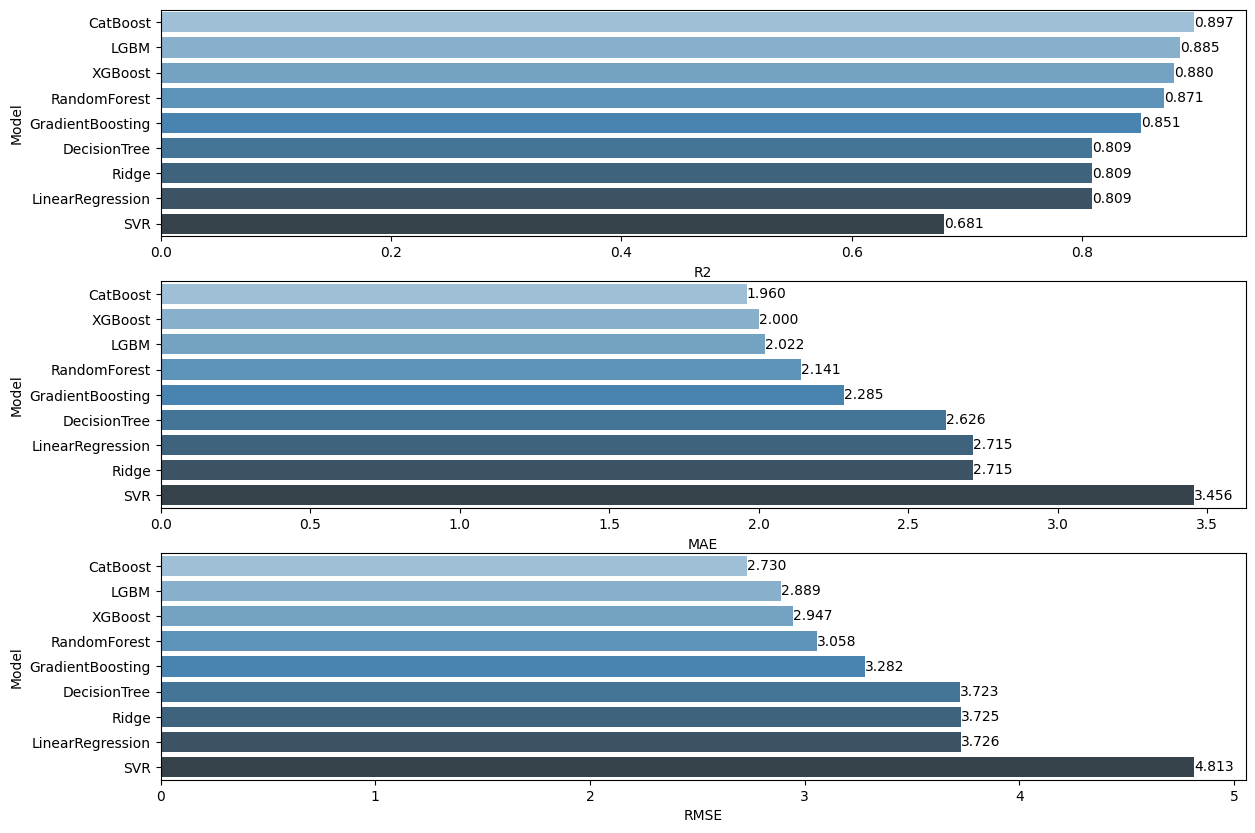

In [44]:
compare = pd.DataFrame({"Model": ["LinearRegression", "Ridge", "SVR", "DecisionTree", "RandomForest", "GradientBoosting",
                                 "XGBoost", "LGBM" , "CatBoost"],
                        "R2": [lr_r2, rdg_r2, svr_r2, dt_r2, rf_r2 , gb_r2, xgb_r2, lgb_r2 , cb_r2],
                        "MAE": [lr_mae, rdg_mae, svr_mae, dt_mae, rf_mae, gb_mae, xgb_mae, lgb_mae , cb_mae],
                        "RMSE": [lr_rmse, rdg_rmse, svr_rmse, dt_rmse, rf_rmse, gb_rmse, xgb_rmse, lgb_rmse , cb_rmse],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="MAE", ascending=True)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# CatBoost was better a little bit. But most of models around %88-90 R2 score.
# We need to do something more at EDA in the future...

In [ ]:
# Done